In [6]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
import geopandas as gpd
import json

plotly.offline.init_notebook_mode(connected=True)

In [134]:
def load_geoJson( file_in):
    
    with open(file_in) as file_in:
        districts = json.load(file_in)
    
    district_features = districts['features']
    
    return district_features

In [151]:
def create_geoDict (geoJson):
    
    geoJSON=dict(type= 'FeatureCollection', 
             features = [])
    
    for k, tfeature in enumerate(geoJson):
        geo_feature = dict(id=tfeature['properties']['DISTRICT'], type= "Feature")
        geo_feature['properties'] = tfeature['properties']
        geo_feature['geometry'] = tfeature['geometry']  
        geoJSON['features'].append(geo_feature)
        
    return geoJSON

In [152]:
file_in = '2009_districts.geojson'
districts_geo = load_geoJson(file_in)
districts_geo_dict = create_geoDict (districts_geo)

In [118]:
# Create df in which to hard code values

districts_list = [d['properties']['DISTRICT'] for d in districts_geo]
districts_df = pd.DataFrame(districts_list)
districts_df.rename(columns={0: "district"}, inplace=True)
districts_df['agrictulture'] = 0
districts_df['new-infrastructure'] = 0
districts_df.head()

,district,agrictulture,new-infrastructure
0,Bent Jbayl,0,0
1,Nabatiyeh,0,0
2,Beirut-three,0,0
3,Zahleh,0,0
4,Aley,0,0


In [172]:
# hard code values for each district - Agriculture (in area Hectares Ha)

districts_df.loc[districts_df['district'] == 'Bent Jbayl', 'agriculture'] = 5
districts_df.loc[districts_df['district'] == 'Nabatiyeh', 'agriculture'] = 13250
districts_df.loc[districts_df['district'] == 'Beirut-three', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Zahleh', 'agriculture'] = 24500
districts_df.loc[districts_df['district'] == 'Aley', 'agriculture'] = 7750
districts_df.loc[districts_df['district'] == 'Baabda', 'agriculture'] = 4000
districts_df.loc[districts_df['district'] == 'Chouf', 'agriculture'] = 6000
districts_df.loc[districts_df['district'] == 'Jbayl', 'agriculture'] = 6750
districts_df.loc[districts_df['district'] == 'Kesrouan', 'agriculture'] = 3000
districts_df.loc[districts_df['district'] == 'Matn', 'agriculture'] = 4000
districts_df.loc[districts_df['district'] == 'Akkar', 'agriculture'] = 37000
districts_df.loc[districts_df['district'] == 'Batroun', 'agriculture'] = 6500
districts_df.loc[districts_df['district'] == 'Bcharreh', 'agriculture'] = 2500
districts_df.loc[districts_df['district'] == 'Koura', 'agriculture'] = 10500
districts_df.loc[districts_df['district'] == 'Miniyeh-Danniyeh', 'agriculture'] = 8750
districts_df.loc[districts_df['district'] == 'Tripoli', 'agriculture'] = 1500
districts_df.loc[districts_df['district'] == 'Zgharta', 'agriculture'] = 9000
districts_df.loc[districts_df['district'] == 'Jezzine', 'agriculture'] = 3750
districts_df.loc[districts_df['district'] == 'Saida', 'agriculture'] = 1000
districts_df.loc[districts_df['district'] == 'Sour', 'agriculture'] = 4
districts_df.loc[districts_df['district'] == 'Zahrany', 'agriculture'] = 16000
districts_df.loc[districts_df['district'] == 'Beirut-two', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Beirut-one', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Baalbek-Hermel', 'agriculture'] = 77000
districts_df.loc[districts_df['district'] == 'WestBekaa-Rachaya', 'agriculture'] = 30000
districts_df.loc[districts_df['district'] == 'Marjayoun-Hasbaya', 'agriculture'] = 6

districts_df.head()

,district,agrictulture,new-infrastructure,agriculture
0,Bent Jbayl,0,0,5.0
1,Nabatiyeh,0,0,13250.0
2,Beirut-three,0,0,0.0
3,Zahleh,0,0,24500.0
4,Aley,0,0,7750.0


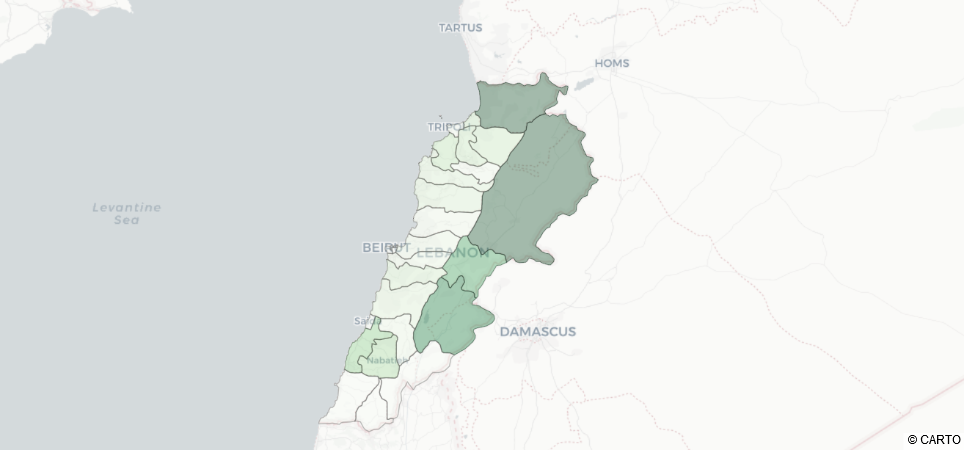

In [173]:
fig = go.Figure(go.Choroplethmapbox(geojson=districts_geo_dict, locations = districts_df.district ,
                                    z=districts_df['agriculture'],
                                    colorscale="Greens", zmin=0, zmax=35000, marker_line_width=1, showscale = False, 
                                    marker_opacity=0.35))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=7, mapbox_center = {"lon": 36, "lat": 34})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [153]:
# Just to see the format of the data
districts_geo_dict['features']

[{'id': 'Bent Jbayl',
  'type': 'Feature',
  'properties': {'ISO': 'LBN',
   'NAME_0': 'Lebanon',
   'ID_1': 1,
   'ID_2': 1,
   'GOVERNORATE': 'An Nabatiyah',
   'DISTRICT': 'Bent Jbayl'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[35.43885040283208, 33.298957824707024],
     [35.44070816040044, 33.29702377319341],
     [35.444728851318466, 33.292404174804794],
     [35.4475593566895, 33.28913116455089],
     [35.44889831542968, 33.28510665893554],
     [35.4490470886231, 33.28034210205083],
     [35.44726181030267, 33.27319335937499],
     [35.44428253173839, 33.2642593383789],
     [35.44070816040044, 33.253986358642685],
     [35.43996429443359, 33.249965667724716],
     [35.439067840576165, 33.24504852294927],
     [35.437431335449155, 33.239093780517685],
     [35.43683624267589, 33.23537063598632],
     [35.43772888183599, 33.231647491455185],
     [35.438323974609425, 33.229412078857415],
     [35.440410614013665, 33.22151947021483],
     [35.44279098510747, 33.2166